In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import utility

mle_comparison_datafile = '/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/MLE_comparison_results_15D_c1off_c2on_Powell_1000.csv'
run_label = 'cycle 1 on, cycle 2 off'

config_names = [
    "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config_15D_c1on_c2on.json",
    "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config_15D_c1on_c2off.json",
    "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config_15D_c1off_c2on.json",
]
model_names = ['c1_on_c2_on','c1_on_c2_off','c1_off_c2_on']

p_ref_list = []
plt.figure(figsize=(12,10))
for f in config_names:
    config = utility.parse_config_file(f)
    model_parameters = config['model_parameters']
    param_ref = [value[2] for key, value in model_parameters.items()]
    p_ref_list.append(param_ref)

print(p_ref_list[0])



# Define marker and color codes for each row
markers = {
    'Nelder-Mead': 'o',
    'Powell': '^',
    'CG': 's',
    'BFGS': 'd',
    'L-BFGS-B': 'x',
    'TNC': 'p',
    'COBYLA': 'h',
    'SLSQP': 'v',
    'trust-constr': '*',
    'basinhopping': '>',
    'differential_evolution': '<',
    'dual_annealing': '+',
    'direct': 'D'
}

colors = {
    'Nelder-Mead': 'red',
    'Powell': 'blue',
    'CG': 'green',
    'BFGS': 'orange',
    'L-BFGS-B': 'purple',
    'TNC': 'brown',
    'COBYLA': 'gray',
    'SLSQP': 'pink',
    'trust-constr': 'olive',
    'basinhopping': 'magenta',
    'differential_evolution': 'cyan',
    'dual_annealing': 'black',
    'direct': 'yellow'
}

# Load data into a pandas DataFrame
data = pd.read_csv(mle_comparison_datafile)
# convert string representation of lists to actual lists
data['runtime_s'] = data['runtime_s'].apply(ast.literal_eval)
data['rmsd_mle'] = data['rmsd_mle'].apply(ast.literal_eval)
data['rmsd_x'] = data['rmsd_x'].apply(ast.literal_eval)
data['mle_x'] = data['mle_x'].apply(ast.literal_eval)
data['mle'] = data['mle'].apply(ast.literal_eval)
#data['dt_mean'] = data['dt_mean'].apply(ast.literal_eval)



# Create the scatter plot
fig, ax = plt.subplots(figsize=(10,7))
for i, row in data.iterrows():
    x = row['rmsd_x']
    y = row['rmsd_mle']
    marker = markers.get(row['Unnamed: 0'], 'o')
    color = colors.get(row['Unnamed: 0'], 'black')
    size =  30*np.exp(1.5*float(row['dt_mean']) / float(max(data['dt_mean'])))
    ax.scatter(x, y, s=size, marker=marker, color=color, label=row['Unnamed: 0'])
plt.title(f'comparison of MLE optimization algorithms - {len(data.iloc[-1]["runtime_s"])} replicas/algorithm')
plt.ylabel('RMSD_MLE')
plt.xlabel('RMSD_X')
fig.text(0.001, -0.05, 'y=distance between predicted and ref max likelihood;\nx=distance between predicted and ref parameter set;\nmarker size~run time;\n', ha='left')
ax.legend()
plt.tight_layout()
plt.show()

# Create the scatter plot (zoomed w/ top 10 selected)
fig, ax = plt.subplots(figsize=(10,7))
for i, row in data.iterrows():
    x = row['rmsd_x']
    y = row['rmsd_mle']
    min_i = np.argsort(y)[:10]
    print(min_i)
    x_min = [x[i] for i in min_i]
    y_min = [y[i] for i in min_i]
    marker = markers.get(row['Unnamed: 0'], 'o')
    color = colors.get(row['Unnamed: 0'], 'black')
    size =  30*np.exp(1.5*float(row['dt_mean']) / float(max(data['dt_mean'])))
    ax.scatter(x, y, s=size, marker=marker, color=color, label=row['Unnamed: 0'])
    ax.scatter(x_min,y_min,s=200, marker=marker, color='red', label='top 10 max likelihood values')
plt.title(f'comparison of MLE optimization algorithms - {len(data.iloc[-1]["runtime_s"])} replicas/algorithm')
plt.ylabel('RMSD_MLE')
plt.xlabel('RMSD_X')
fig.text(0.001, -0.05, 'y=distance between predicted and ref max likelihood;\nx=distance between predicted and ref parameter set;\nmarker size~run time;\n', ha='left')
ax.legend()
plt.ylim(0,500)
plt.xlim(0,2.5)

plt.tight_layout()
plt.show()


# Create the scatter plot (comparing other models)
fig, ax = plt.subplots(figsize=(10,7))
for i, row in data.iterrows():
    y = row['rmsd_mle']
    x = row['mle_x']
    x_1 = [np.sqrt(np.mean(np.square(np.array(x)-np.array(p_ref_list[0])),axis=1))]
    x_2 = [np.sqrt(np.mean(np.square(np.array(x)-np.array(p_ref_list[1])),axis=1))]
    x_3 = [np.sqrt(np.mean(np.square(np.array(x)-np.array(p_ref_list[2])),axis=1))]

    marker = markers.get(row['Unnamed: 0'], 'o')
    color = colors.get(row['Unnamed: 0'], 'black')
    size =  30*np.exp(1.5*float(row['dt_mean']) / float(max(data['dt_mean'])))
    ax.scatter(x_1, y, s=size, marker=marker, color='blue', label=f'{model_names[0]}')
    ax.scatter(x_2, y, s=size, marker=marker, color='green', label=f'{model_names[1]}')
    ax.scatter(x_3, y, s=size, marker=marker, color='red', label=f'{model_names[2]}')
    
plt.title(f'MLE for {run_label} - {len(data.iloc[-1]["runtime_s"])} replicas/algorithm')
plt.ylabel('RSMD log-likelihood')
plt.xlabel('RMSD (parameters)')
ax.legend()
plt.ylim(-1,500)
plt.xlim(0,2.5)
plt.tight_layout()
plt.show()


# Create the scatter plot (comparing other models)
fig, ax = plt.subplots(figsize=(10,7))
for i, row in data.iterrows():
    y = row['rmsd_mle']
    x = row['mle_x']
    min_i = np.argsort(y)[:100]
    x_min_i = [x[i] for i in min_i]
    x_1 = [np.sqrt(np.mean(np.square(np.array(x_min_i)-np.array(p_ref_list[0])),axis=1))]
    x_2 = [np.sqrt(np.mean(np.square(np.array(x_min_i)-np.array(p_ref_list[1])),axis=1))]
    x_3 = [np.sqrt(np.mean(np.square(np.array(x_min_i)-np.array(p_ref_list[2])),axis=1))]
    ax.hist(x_1, bins=50, density=True, histtype='step', color='blue',label=f'{model_names[0]}')
    ax.hist(x_2, bins=50, density=True, histtype='step', color='green', label=f'{model_names[1]}')
    ax.hist(x_3, bins=50, density=True, histtype='step', color='red', label=f'{model_names[2]}')
    
plt.title(f'Comparison of parameter RMSD distributions for {run_label} - using 100 best MLE replicas')
plt.ylabel('probability density')
plt.xlabel('RMSD (parameters)')
ax.legend()
# plt.ylim(-1,500)
# plt.xlim(0,2.5)
plt.tight_layout()
plt.show()



# Create the bar plot of runtime
fig, ax = plt.subplots(figsize=(17,7))
for i, row in data.iterrows():
    x = row['Unnamed: 0']
    y = row['dt_mean']
    plt.bar(x, y)
    
plt.title(f'comparison of MLE optimization algorithms - {len(data.iloc[-1]["runtime_s"])} replicas/algorithm')
plt.ylabel('avg. wall clock (s)')
plt.yscale('log')


plt.tight_layout()
plt.show()

In [ ]:
import analysis
import sampler
import ssme
import utility 
import numpy
import matplotlib.pyplot as plt

config_names = [
    "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config_15D_c1on_c2on.json",
    "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config_15D_c1on_c2off.json",
    "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config_15D_c1off_c2on.json",
]

p_ref_list = []
plt.figure(figsize=(12,10))
for f in config_names:
    config_fname = f
    print(f)
    config = utility.parse_config_file(config_fname)

    model_file = config['model_file']
    data_file = config['data_file']
    simulation_kwargs = config['simulation_kwargs']
    model_parameters = config['model_parameters']
    run_kwargs = config['run_kwargs']
    utility.save_config_file(config, f"{run_kwargs['output_label']}_log.txt")

    seed = run_kwargs['seed']
    numpy.random.seed(seed)
    param_ref = [value[2] for key, value in model_parameters.items()]
    param_bounds = [[value[0], value[1]] for key, value in model_parameters.items()]
    k_ref = param_ref[:-1]
    sigma_ref = param_ref[-1]
    rr_model = utility.load_rr_model_from_sbml(model_file)

    res = ssme.simulate_y_pred_rr(rr_model, k_ref,**simulation_kwargs)
    t = res[0]
    y = res[1]

    #y_obs = y + numpy.random.normal(0, 10**sigma_ref, numpy.size(y))
    #numpy.savetxt("antiporter_15D_model_3c_no_events_data_c1on_c2on.csv", y_obs)
    y_obs = numpy.loadtxt(data_file, delimiter=',')
    y_null = numpy.zeros(numpy.shape(y_obs))
    
   
    logl_ref = sampler.calc_normal_log_likelihood(y_obs,y,10**sigma_ref)
    logl_null = sampler.calc_normal_log_likelihood(y_obs,y_null,10**sigma_ref)
    print(logl_ref)
    print(logl_null)

    plt.plot(y)
    plt.plot(y_obs, 'o', alpha=0.45)
    #plt.plot(y_obs2, 'o', alpha=0.45)
    plt.plot(y_null, '--')
    print(y[0])
    print(y_obs[0])
    print(sampler.calc_normal_log_likelihood(y_obs[0],y[0],10**sigma_ref))
    print(-1/2*numpy.log(2*numpy.pi*(10**sigma_ref)**2) - 1/(2*(10**sigma_ref)**2)*numpy.sum((y_obs[0] - y[0])**2))
    print('\n')

#10716.658898445918

In [ ]:
config_names = [
    "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config_15D_c1on_c2on_test.json",
    "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config_15D_c1on_c2off_test.json",
    "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config_15D_c1off_c2on_test.json",
]
labels = ['c1on, c2on', 'c1on, c2off', 'c1off, c2on',]
linestyles = ['solid',  'dashed','dotted',]
colors = ['black', 'green', 'red']

p_ref_list = []
plt.figure(figsize=(12,10))
for i, f in enumerate(config_names):
    config_fname = f
    print(f)
    config = utility.parse_config_file(config_fname)

    model_file = config['model_file']
    data_file = config['data_file']
    simulation_kwargs = config['simulation_kwargs']
    model_parameters = config['model_parameters']
    run_kwargs = config['run_kwargs']
    utility.save_config_file(config, f"{run_kwargs['output_label']}_log.txt")

    seed = run_kwargs['seed']
    numpy.random.seed(seed)
    param_ref = [value[2] for key, value in model_parameters.items()]
    param_bounds = [[value[0], value[1]] for key, value in model_parameters.items()]
    k_ref = param_ref[:-1]
    sigma_ref = param_ref[-1]
    rr_model = utility.load_rr_model_from_sbml(model_file)
   

    res = ssme.simulate_y_pred_rr(rr_model, k_ref,**simulation_kwargs)
    t = res[0]
    y = res[1]
    rxn7 = res[2]
    rxn8 = res[3]
    print(rr_model['k6_r'])
    print(rr_model['k7_r'])

    y_obs = y + numpy.random.normal(0, 10**sigma_ref, numpy.size(y))
    #numpy.savetxt("antiporter_15D_model_3c_no_events_data_c1on_c2on.csv", y_obs)
    #y_obs = numpy.loadtxt(data_file, delimiter=',')
    #y_null = numpy.zeros(numpy.shape(y_obs))
    
   
    logl_ref = sampler.calc_normal_log_likelihood(y_obs,y,10**sigma_ref)
    #logl_null = sampler.calc_normal_log_likelihood(y_obs,y_null,10**sigma_ref)
    print(logl_ref)
    #print(logl_null)

    #plt.plot(y, linestyle = linestyles[i], color=colors[i],label=f'{labels[i]}')
    #plt.plot(y_obs, 'o', alpha=0.45)



    plt.plot(rxn8, linestyle = linestyles[i], color=colors[i],label=f'{labels[i]}')
    print(rxn8[:10])
plt.legend()
#plt.ylim(-1e-22, 1e-22)


In [ ]:
import numpy as np

ssme_data = np.loadtxt('/Users/georgeau/Desktop/SSME/ssme_test_data.csv')
stage_2 = ssme_data[1150:1650]
stage_3 = ssme_data[2150:2650]
trimmed_data = np.hstack([stage_2, stage_3])/1e9
plt.figure(figsize=(10,7))
plt.plot(trimmed_data)
np.savetxt('gdx_ssme_data_2.csv', trimmed_data, delimiter=',')


In [ ]:
import tellurium as te
import analysis
import sampler
import ssme
import utility 
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import ast


mle_comparison_datafile = '/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/MLE_comparison_results_15D_gdx_ssme_2_DE.csv'
config_fname = '/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config_15D_real_data_v2.json'

config = utility.parse_config_file(config_fname)
model_file = config['model_file']
data_file = config['data_file']
simulation_kwargs = config['simulation_kwargs']
model_parameters = config['model_parameters']
run_kwargs = config['run_kwargs']
seed = run_kwargs['seed']
numpy.random.seed(seed)
param_ref = [value[2] for key, value in model_parameters.items()]
param_bounds = [[value[0], value[1]] for key, value in model_parameters.items()]
k_ref = param_ref[:-1]
sigma_ref = param_ref[-1]
rr_model = utility.load_rr_model_from_sbml(model_file)
   
data = pd.read_csv(mle_comparison_datafile)
MLE_parameter_sets = data['mle_x'].apply(ast.literal_eval)

plt.figure(figsize=(15,12))
for i in MLE_parameter_sets:
    for j in i:
        x = j[:-1]
        y = ssme.simulate_y_pred_rr(rr_model,x,**simulation_kwargs)[1]
        print(len(y))
        plt.plot(y)

y_obs = numpy.loadtxt('/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/gdx_ssme_data_2.csv', delimiter=',')
plt.plot(y_obs, color='black', label='y_data')

print(len(y_obs))
plt.legend()


X_array = []
for i in MLE_parameter_sets:
    for j in i:
        X_array.append(j)

X_T  = numpy.transpose(X_array)
N_dim = len(X_T)

for i in range(N_dim):
    plt.figure()
    plt.title(f'parameter_{i} distribution (MLE)')
    plt.hist(X_T[i], density=True)
    plt.show()

In [31]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import utility

rr_model = te.loada('/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/models/antiporter_16D_2_1_stoich.txt')
rr_model.exportToSBML('/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/antiporter_16D_2_1_stoich.xml')

1000


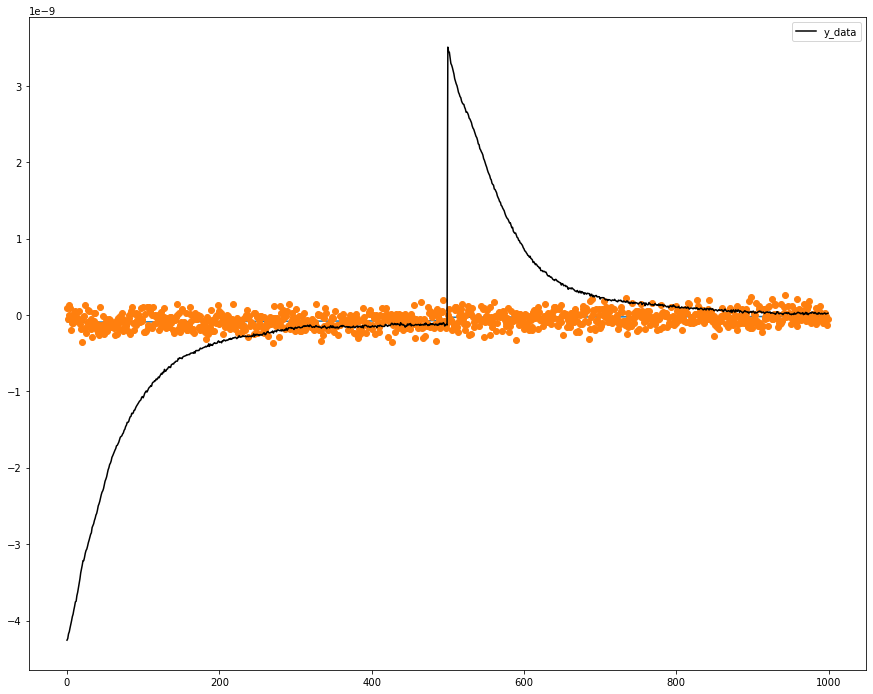

In [32]:
import tellurium as te
import analysis
import sampler
import ssme
import utility 
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import ast


#mle_comparison_datafile = '/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/MLE_comparison_results_15D_gdx_ssme_2_DE.csv'
config_fname = '/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/config/config_16D_2_1_stoich_real_data_v2.json'

config = utility.parse_config_file(config_fname)
model_file = config['model_file']
data_file = config['data_file']
simulation_kwargs = config['simulation_kwargs']
model_parameters = config['model_parameters']
run_kwargs = config['run_kwargs']
seed = run_kwargs['seed']
numpy.random.seed(seed)
param_ref = [value[2] for key, value in model_parameters.items()]
param_bounds = [[value[0], value[1]] for key, value in model_parameters.items()]
k_ref = param_ref[:-1]
sigma_ref = param_ref[-1]
rr_model = utility.load_rr_model_from_sbml(model_file)


plt.figure(figsize=(15,12))

y_pred = ssme.simulate_y_pred_rr(rr_model,k_ref,**simulation_kwargs)[1]
y_pred_noise = y_pred + numpy.random.normal(0, 10**sigma_ref, size=np.size(y_pred))
plt.plot(y_pred)
plt.plot(y_pred_noise, 'o')

y_obs = numpy.loadtxt('/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/data/gdx_ssme_data_2.csv', delimiter=',')
plt.plot(y_obs, color='black', label='y_data')

print(len(y_obs))
plt.legend()

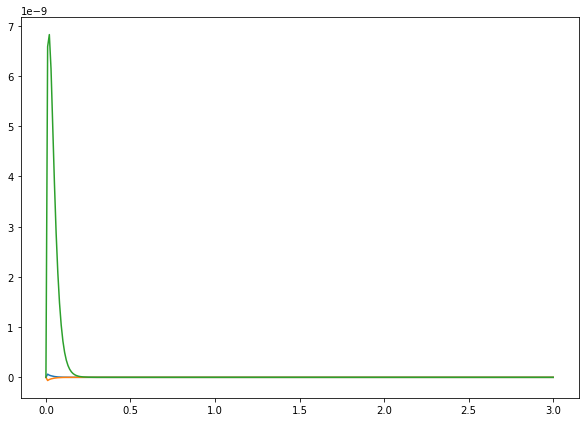

In [34]:
rr_model = te.loada('/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/data/models/antiporter_16D_2_1_stoich.txt')

rr_model.integrator.absolute_tolerance = 1e-26
rr_model.integrator.relative_tolerance = 1e-16

res = rr_model.simulate(0,3,300, selections=['time', 'rxn4', 'rxn6', 'current'])

plt.figure(figsize=(10,7))
plt.plot(res['time'], res['rxn4'])
plt.plot(res['time'], res['rxn6'])
plt.plot(res['time'], res['current'])